In [359]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [360]:
#we use SPY for a mean market movement estimation
tickers = ["MSFT", "SPY"]
data_source = 'yahoo'
start_date = '2000-01-01'
end_date = '2017-09-08'
panel_data = data.DataReader(tickers, data_source, start_date, end_date)
close = panel_data.loc['Close']
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
close = close.reindex(all_weekdays)
close = close.dropna()

In [361]:
close.head()

,MSFT,SPY
2000-01-03,58.28125,145.4375
2000-01-04,56.31250,139.7500
2000-01-05,56.90625,140.0000
2000-01-06,55.00000,137.7500
2000-01-07,55.71875,145.7500


In [362]:
#GDP of USA from 1999 to 2016. Source: https://www.google.de/publicdata/explore?ds=d5bncppjof8f9_
GDP=list(map(float,"""34620
36449
37273
38166
39677
41921
44307
46437
48061
48401
47001
48373
49790
51450
52787
54598
56207
57466""".split()))

In [363]:
close['GDP'] = 0 #create column

In [364]:
for i, year in enumerate(range(1999,2017)):
    close.loc["%s-01-01"%(year+1) :"%s-12-31"%(year+1),'GDP'] = GDP[i]
    

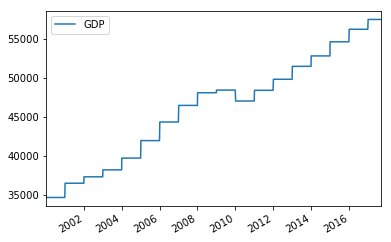

In [365]:
close.plot(y="GDP")

In [366]:
#weather information scraped from: https://www.wunderground.com/history/airport/KJFK/2000/1/1/DailyHistory.html?req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=&MR=1
mean_temps = [11.0, 11.0, 3.0, 1.0, 6.0, 9.0, 7.0, 6.0, 2.0, 8.0, 12.0, 7.0, 4.0, 9.0, 1.0, 1.0, 3.0, 9.0, 9.0, 1.0, 1.0, 3.0, 3.0, 2.0, 2.0, 4.0, 1.0, 4.0, 4.0, 7.0, 2.0, 4.0, 0.0, 0.0, 1.0, 2.0, 2.0, 3.0, 3.0, 8.0, 4.0, 6.0, 4.0, 8.0, 8.0, 10.0, 12.0, 10.0, 4.0, 4.0, 7.0, 11.0, 5.0, 4.0, 4.0, 6.0, 4.0, 12.0, 7.0, 11.0, 10.0, 8.0, 8.0, 11.0, 12.0, 8.0, 10.0, 12.0, 8.0, 4.0, 8.0, 5.0, 6.0, 9.0, 6.0, 10.0, 10.0, 14.0, 10.0, 5.0, 6.0, 10.0, 10.0, 14.0, 11.0, 12.0, 19.0, 22.0, 23.0, 17.0, 17.0, 17.0, 14.0, 13.0, 17.0, 17.0, 13.0, 12.0, 13.0, 18.0, 19.0, 19.0, 13.0, 13.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 18.0, 14.0, 13.0, 18.0, 22.0, 20.0, 22.0, 21.0, 24.0, 24.0, 24.0, 26.0, 22.0, 20.0, 22.0, 23.0, 27.0, 22.0, 22.0, 28.0, 24.0, 22.0, 23.0, 22.0, 22.0, 27.0, 19.0, 20.0, 21.0, 22.0, 20.0, 19.0, 20.0, 20.0, 23.0, 21.0, 24.0, 24.0, 24.0, 28.0, 28.0, 27.0, 26.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 25.0, 16.0, 16.0, 16.0, 20.0, 21.0, 23.0, 24.0, 20.0, 20.0, 19.0, 19.0, 23.0, 22.0, 17.0, 14.0, 12.0, 13.0, 16.0, 11.0, 17.0, 21.0, 17.0, 16.0, 19.0, 7.0, 7.0, 14.0, 13.0, 17.0, 14.0, 13.0, 14.0, 14.0, 12.0, 10.0, 13.0, 16.0, 14.0, 14.0, 6.0, 10.0, 10.0, 12.0, 13.0, 9.0, 9.0, 11.0, 12.0, 14.0, 8.0, 9.0, 6.0, 6.0, 8.0, 3.0, 1.0, 0.0, 1.0, 9.0, 7.0, 6.0, 5.0, 3.0, 1.0, 3.0, 2.0, 0.0, 1.0, 6.0, 4.0, 3.0, 3.0, 1.0, 1.0, 1.0, 0.0, 2.0, 3.0, 6.0, 3.0, 5.0, 4.0, 6.0, 5.0, 2.0, 3.0, 1.0, 1.0, 2.0, 2.0, 2.0, 4.0, 4.0, 1.0, 3.0, 2.0, 2.0, 1.0, 0.0, 3.0, 1.0, 6.0, 4.0, 6.0, 3.0, 1.0, 4.0, 4.0, 1.0, 6.0, 3.0, 4.0, 3.0, 6.0, 2.0, 7.0, 1.0, 7.0, 2.0, 6.0, 5.0, 0.0, 1.0, 2.0, 0.0, 1.0, 2.0, 0.0, 3.0, 3.0, 6.0, 7.0, 6.0, 8.0, 7.0, 7.0, 6.0, 4.0, 9.0, 0.0, 1.0, 3.0, 3.0, 5.0, 6.0, 7.0, 7.0, 8.0, 7.0, 11.0, 11.0, 9.0, 11.0, 10.0, 9.0, 8.0, 6.0, 8.0, 18.0, 18.0, 11.0, 11.0, 11.0, 14.0, 19.0, 20.0, 22.0, 23.0, 9.0, 11.0, 14.0, 20.0, 21.0, 16.0, 17.0, 13.0, 13.0, 13.0, 13.0, 16.0, 14.0, 16.0, 13.0, 18.0, 16.0, 16.0, 14.0, 18.0, 19.0, 22.0, 19.0, 22.0, 21.0, 21.0, 22.0, 22.0, 22.0, 23.0, 23.0, 23.0, 22.0, 22.0, 23.0, 26.0, 27.0, 29.0, 24.0, 18.0, 18.0, 23.0, 21.0, 23.0, 26.0, 24.0, 22.0, 21.0, 23.0, 26.0, 23.0, 22.0, 21.0, 24.0, 26.0, 29.0, 23.0, 20.0, 21.0, 21.0, 25.0, 26.0, 24.0, 26.0, 29.0, 32.0, 30.0, 28.0, 25.0, 24.0, 23.0, 22.0, 26.0, 26.0, 25.0, 26.0, 24.0, 23.0, 24.0, 24.0, 23.0, 22.0, 26.0, 22.0, 22.0, 19.0, 22.0, 24.0, 18.0, 20.0, 20.0, 21.0, 21.0, 22.0, 19.0, 14.0, 15.0, 14.0, 11.0, 16.0, 18.0, 20.0, 19.0, 8.0, 8.0, 13.0, 17.0, 17.0, 18.0, 13.0, 12.0, 10.0, 10.0, 18.0, 16.0, 19.0, 21.0, 11.0, 8.0, 12.0, 9.0, 13.0, 16.0, 9.0, 9.0, 13.0, 8.0, 9.0, 5.0, 6.0, 9.0, 13.0, 16.0, 10.0, 8.0, 4.0, 8.0, 14.0, 10.0, 14.0, 11.0, 14.0, 7.0, 11.0, 14.0, 16.0, 13.0, 4.0, 9.0, 6.0, 10.0, 11.0, 7.0, 9.0, 8.0, 6.0, 3.0, 7.0, 1.0, 1.0, 2.0, 3.0, 1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 7.0, 7.0, 4.0, 6.0, 4.0, 5.0, 1.0, 5.0, 6.0, 8.0, 6.0, 8.0, 12.0, 11.0, 4.0, 8.0, 2.0, 3.0, 2.0, 3.0, 7.0, 4.0, 1.0, 1.0, 2.0, 3.0, 3.0, 7.0, 12.0, 8.0, 4.0, 9.0, 4.0, 1.0, 3.0, 2.0, 2.0, 8.0, 9.0, 7.0, 1.0, 6.0, 6.0, 10.0, 9.0, 2.0, 5.0, 6.0, 5.0, 3.0, 6.0, 7.0, 8.0, 7.0, 12.0, 8.0, 11.0, 7.0, 3.0, 9.0, 12.0, 14.0, 10.0, 8.0, 19.0, 21.0, 24.0, 24.0, 20.0, 9.0, 8.0, 8.0, 9.0, 9.0, 10.0, 9.0, 13.0, 13.0, 13.0, 14.0, 17.0, 17.0, 11.0, 18.0, 11.0, 12.0, 14.0, 17.0, 21.0, 10.0, 11.0, 13.0, 14.0, 20.0, 19.0, 20.0, 19.0, 21.0, 19.0, 18.0, 21.0, 21.0, 17.0, 21.0, 22.0, 24.0, 16.0, 14.0, 20.0, 20.0, 21.0, 21.0, 21.0, 28.0, 24.0, 26.0, 27.0, 26.0, 26.0, 27.0, 31.0, 27.0, 24.0, 27.0, 25.0, 21.0, 21.0, 26.0, 27.0, 23.0, 29.0, 26.0, 26.0, 28.0, 23.0, 21.0, 19.0, 30.0, 31.0, 28.0, 29.0, 27.0, 28.0, 24.0, 22.0, 23.0, 23.0, 25.0, 28.0, 27.0, 26.0, 26.0, 28.0, 23.0, 24.0, 23.0, 22.0, 22.0, 24.0, 21.0, 19.0, 18.0, 21.0, 27.0, 23.0, 20.0, 23.0, 23.0, 22.0, 18.0, 21.0, 23.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 19.0, 16.0, 19.0, 17.0, 21.0, 23.0, 22.0, 19.0, 20.0, 13.0, 13.0, 16.0, 14.0, 11.0, 9.0, 14.0, 12.0, 11.0, 11.0, 9.0, 9.0, 6.0, 9.0, 8.0, 5.0, 4.0, 7.0, 7.0, 7.0, 7.0, 8.0, 4.0, 8.0, 16.0, 11.0, 8.0, 8.0, 10.0, 6.0, 5.0, 8.0, 7.0, 9.0, 7.0, 6.0, 1.0, 1.0, 2.0, 2.0, 4.0, 3.0, 1.0, 5.0, 2.0, 1.0, 5.0, 4.0, 2.0, 3.0, 2.0, 3.0, 9.0, 4.0, 2.0, 0.0, 1.0, 2.0, 6.0, 1.0, 0.0, 0.0, 2.0, 2.0, 7.0, 3.0, 0.0, 4.0, 3.0, 4.0, 6.0, 6.0, 8.0, 10.0, 8.0, 8.0, 9.0, 2.0, 3.0, 1.0, 6.0, 6.0, 1.0, 3.0, 1.0, 1.0, 4.0, 3.0, 6.0, 6.0, 2.0, 2.0, 3.0, 0.0, 0.0, 3.0, 7.0, 3.0, 0.0, 3.0, 3.0, 6.0, 0.0, 5.0, 4.0, 2.0, 3.0, 4.0, 2.0, 14.0, 11.0, 3.0, 6.0, 10.0, 9.0, 7.0, 10.0, 10.0, 9.0, 3.0, 2.0, 8.0, 8.0, 3.0, 1.0, 1.0, 2.0, 6.0, 4.0, 8.0, 12.0, 20.0, 5.0, 8.0, 11.0, 8.0, 10.0, 11.0, 14.0, 17.0, 13.0, 13.0, 16.0, 10.0, 11.0, 16.0, 13.0, 12.0, 15.0, 13.0, 14.0, 14.0, 13.0, 14.0, 17.0, 13.0, 12.0, 11.0, 13.0, 14.0, 17.0, 19.0, 17.0, 17.0, 12.0, 18.0, 19.0, 17.0, 22.0, 19.0, 22.0, 17.0, 16.0, 14.0, 17.0, 19.0, 19.0, 22.0, 26.0, 28.0, 29.0, 28.0, 24.0, 23.0, 24.0, 21.0, 27.0, 28.0, 25.0, 20.0, 22.0, 22.0, 22.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 22.0, 24.0, 26.0, 21.0, 21.0, 22.0, 23.0, 24.0, 23.0, 23.0, 23.0, 24.0, 24.0, 24.0, 24.0, 29.0, 28.0, 21.0, 23.0, 26.0, 26.0, 28.0, 24.0, 24.0, 27.0, 24.0, 23.0, 17.0, 19.0, 22.0, 22.0, 21.0, 20.0, 18.0, 21.0, 19.0, 23.0, 23.0, 21.0, 20.0, 24.0, 19.0, 21.0, 19.0, 21.0, 20.0, 17.0, 14.0, 15.0, 12.0, 9.0, 11.0, 11.0, 17.0, 20.0, 16.0, 18.0, 16.0, 15.0, 14.0, 11.0, 9.0, 18.0, 9.0, 6.0, 7.0, 14.0, 11.0, 12.0, 12.0, 12.0, 18.0, 13.0, 13.0, 13.0, 11.0, 3.0, 8.0, 15.0, 9.0, 4.0, 10.0, 10.0, 14.0, 10.0, 11.0, 8.0, 5.0, 4.0, 13.0, 7.0, 1.0, 3.0, 1.0, 0.0, 2.0, 0.0, 6.0, 9.0, 3.0, 3.0, 2.0, 7.0, 1.0, 0.0, 4.0, 7.0, 9.0, 2.0, 4.0, 7.0, 4.0, 6.0, 3.0, 0.0, 6.0, 3.0, 8.0, 1.0, 0.0, 11.0, 12.0, 11.0, 4.0, 6.0, 2.0, 9.0, 8.0, 6.0, 4.0, 5.0, 7.0, 2.0, 0.0, 4.0, 1.0, 1.0, 1.0, 4.0, 1.0, 0.0, 2.0, 2.0, 2.0, 3.0, 1.0, 3.0, 0.0, 0.0, 2.0, 2.0, 9.0, 11.0, 11.0, 7.0, 7.0, 2.0, 3.0, 4.0, 7.0, 6.0, 9.0, 2.0, 2.0, 0.0, 2.0, 0.0, 1.0, 6.0, 7.0, 10.0, 6.0, 4.0, 7.0, 9.0, 7.0, 3.0, 7.0, 12.0, 8.0, 9.0, 10.0, 11.0, 10.0, 11.0, 13.0, 18.0, 11.0, 16.0, 12.0, 11.0, 16.0, 10.0, 13.0, 13.0, 12.0, 11.0, 11.0, 13.0, 19.0, 16.0, 19.0, 22.0, 20.0, 16.0, 17.0, 19.0, 19.0, 17.0, 19.0, 19.0, 17.0, 14.0, 17.0, 19.0, 16.0, 19.0, 20.0, 18.0, 18.0, 23.0, 26.0, 22.0, 20.0, 24.0, 26.0, 24.0, 26.0, 20.0, 20.0, 23.0, 22.0, 22.0, 22.0, 21.0, 22.0, 22.0, 23.0, 24.0, 23.0, 26.0, 24.0, 20.0, 19.0, 21.0, 23.0, 23.0, 24.0, 26.0, 26.0, 24.0, 24.0, 22.0, 21.0, 22.0, 24.0, 24.0, 26.0, 25.0, 27.0, 22.0, 20.0, 23.0, 23.0, 24.0, 24.0, 24.0, 21.0, 21.0, 22.0, 25.0, 26.0, 21.0, 22.0, 20.0, 20.0, 23.0, 26.0, 26.0, 23.0, 22.0, 21.0, 22.0, 22.0, 23.0, 23.0, 23.0, 20.0, 19.0, 22.0, 22.0, 16.0, 21.0, 22.0, 23.0, 19.0, 20.0, 20.0, 18.0, 17.0, 18.0, 16.0, 12.0, 12.0, 17.0, 17.0, 13.0, 14.0, 13.0, 14.0, 16.0, 11.0, 10.0, 11.0, 11.0, 11.0, 11.0, 14.0, 13.0, 11.0, 11.0, 13.0, 12.0, 12.0, 7.0, 10.0, 9.0, 3.0, 2.0, 10.0, 6.0, 9.0, 9.0, 8.0, 9.0, 13.0, 11.0, 10.0, 11.0, 4.0, 8.0, 7.0, 10.0, 6.0, 4.0, 3.0, 8.0, 11.0, 6.0, 8.0, 6.0, 0.0, 3.0, 2.0, 4.0, 9.0, 4.0, 4.0, 11.0, 6.0, 5.0, 3.0, 4.0, 6.0, 9.0, 7.0, 4.0, 3.0, 3.0, 7.0, 3.0, 3.0, 8.0, 7.0, 10.0, 8.0, 3.0, 10.0, 10.0, 3.0, 2.0, 11.0, 10.0, 1.0, 3.0, 1.0, 0.0, 3.0, 4.0, 4.0, 7.0, 3.0, 2.0, 4.0, 8.0, 6.0, 1.0, 4.0, 3.0, 2.0, 3.0, 2.0, 1.0, 0.0, 0.0, 2.0, 2.0, 6.0, 0.0, 6.0, 3.0, 2.0, 2.0, 3.0, 4.0, 3.0, 6.0, 6.0, 7.0, 3.0, 4.0, 8.0, 11.0, 9.0, 6.0, 7.0, 10.0, 12.0, 11.0, 12.0, 12.0, 9.0, 8.0, 8.0, 10.0, 9.0, 17.0, 13.0, 19.0, 15.0, 10.0, 9.0, 12.0, 15.0, 14.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 14.0, 13.0, 12.0, 15.0, 11.0, 15.0, 16.0, 16.0, 16.0, 11.0, 14.0, 13.0, 11.0, 14.0, 18.0, 20.0, 15.0, 14.0, 17.0, 23.0, 25.0, 26.0, 23.0, 22.0, 24.0, 29.0, 22.0, 19.0, 21.0, 18.0, 19.0, 23.0, 20.0, 21.0, 23.0, 24.0, 23.0, 23.0, 23.0, 23.0, 24.0, 21.0, 18.0, 27.0, 24.0, 22.0, 24.0, 24.0, 27.0, 28.0, 29.0, 27.0, 28.0, 25.0, 26.0, 27.0, 23.0, 24.0, 23.0, 29.0, 28.0, 28.0, 30.0, 26.0, 25.0, 26.0, 28.0, 28.0, 23.0, 23.0, 26.0, 23.0, 23.0, 27.0, 24.0, 23.0, 23.0, 24.0, 26.0, 27.0, 26.0, 26.0, 25.0, 22.0, 21.0, 23.0, 23.0, 26.0, 26.0, 23.0, 24.0, 26.0, 23.0, 24.0, 23.0, 23.0, 26.0, 22.0, 20.0, 18.0, 19.0, 14.0, 18.0, 20.0, 20.0, 21.0, 23.0, 16.0, 16.0, 13.0, 16.0, 17.0, 15.0, 17.0, 15.0, 13.0, 12.0, 8.0, 8.0, 8.0, 7.0, 8.0, 13.0, 13.0, 12.0, 12.0, 13.0, 14.0, 13.0, 11.0, 11.0, 7.0, 14.0, 12.0, 14.0, 6.0, 3.0, 8.0, 6.0, 1.0, 2.0, 13.0, 15.0, 12.0, 6.0, 3.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 6.0, 7.0, 1.0, 7.0, 1.0, 2.0, 2.0, 1.0, 5.0, 4.0, 4.0, 8.0, 4.0, 3.0, 1.0, 6.0, 2.0, 10.0, 6.0, 7.0, 8.0, 7.0, 1.0, 8.0, 4.0, 8.0, 4.0, 3.0, 4.0, 1.0, 0.0, 11.0, 4.0, 4.0, 4.0, 11.0, 3.0, 3.0, 1.0, 2.0, 0.0, 3.0, 1.0, 3.0, 6.0, 7.0, 2.0, 2.0, 5.0, 1.0, 4.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 7.0, 14.0, 11.0, 10.0, 5.0, 6.0, 4.0, 1.0, 0.0, 4.0, 6.0, 7.0, 9.0, 7.0, 8.0, 9.0, 9.0, 8.0, 9.0, 4.0, 8.0, 9.0, 9.0, 9.0, 10.0, 17.0, 12.0, 14.0, 16.0, 18.0, 11.0, 11.0, 13.0, 8.0, 13.0, 12.0, 14.0, 14.0, 16.0, 18.0, 19.0, 14.0, 14.0, 14.0, 13.0, 16.0, 14.0, 14.0, 16.0, 17.0, 14.0, 13.0, 14.0, 17.0, 17.0, 17.0, 23.0, 18.0, 21.0, 22.0, 18.0, 18.0, 16.0, 17.0, 18.0, 17.0, 22.0, 19.0, 23.0, 24.0, 23.0, 23.0, 22.0, 23.0, 24.0, 22.0, 23.0, 23.0, 22.0, 23.0, 27.0, 22.0, 21.0, 22.0, 22.0, 23.0, 24.0, 26.0, 22.0, 28.0, 28.0, 26.0, 24.0, 26.0, 23.0, 23.0, 24.0, 26.0, 26.0, 27.0, 31.0, 32.0, 32.0, 29.0, 27.0, 27.0, 23.0, 25.0, 22.0, 23.0, 24.0, 24.0, 24.0, 23.0, 26.0, 24.0, 26.0, 24.0, 23.0, 24.0, 21.0, 21.0, 20.0, 18.0, 19.0, 21.0, 22.0, 22.0, 17.0, 16.0, 18.0, 19.0, 19.0, 22.0, 22.0, 18.0, 16.0, 16.0, 20.0, 19.0, 18.0, 19.0, 16.0, 17.0, 18.0, 20.0, 16.0, 13.0, 18.0, 19.0, 17.0, 16.0, 9.0, 10.0, 15.0, 21.0, 16.0, 14.0, 11.0, 9.0, 10.0, 8.0, 6.0, 12.0, 13.0, 17.0, 11.0, 6.0, 8.0, 11.0, 14.0, 17.0, 13.0, 15.0, 13.0, 14.0, 16.0, 14.0, 6.0, 4.0, 6.0, 11.0, 10.0, 11.0, 12.0, 14.0, 14.0, 3.0, 1.0, 4.0, 5.0, 4.0, 9.0, 7.0, 11.0, 8.0, 8.0, 11.0, 6.0, 3.0, 7.0, 6.0, 10.0, 5.0, 6.0, 6.0, 6.0, 7.0, 11.0, 8.0, 4.0, 1.0, 0.0, 7.0, 4.0, 4.0, 1.0, 3.0, 2.0, 1.0, 2.0, 3.0, 8.0, 3.0, 2.0, 1.0, 1.0, 2.0, 10.0, 8.0, 7.0, 5.0, 3.0, 0.0, 2.0, 4.0, 6.0, 5.0, 3.0, 6.0, 3.0, 1.0, 1.0, 3.0, 5.0, 2.0, 10.0, 1.0, 8.0, 8.0, 3.0, 5.0, 4.0, 6.0, 9.0, 9.0, 0.0, 2.0, 6.0, 1.0, 8.0, 12.0, 6.0, 17.0, 13.0, 9.0, 11.0, 8.0, 8.0, 6.0, 5.0, 5.0, 6.0, 4.0, 6.0, 8.0, 9.0, 8.0, 8.0, 11.0, 13.0, 15.0, 19.0, 13.0, 11.0, 12.0, 18.0, 14.0, 14.0, 13.0, 14.0, 11.0, 12.0, 17.0, 18.0, 18.0, 13.0, 20.0, 19.0, 16.0, 10.0, 17.0, 15.0, 16.0, 19.0, 24.0, 21.0, 19.0, 23.0, 22.0, 19.0, 23.0, 19.0, 17.0, 21.0, 23.0, 23.0, 17.0, 16.0, 18.0, 23.0, 22.0, 24.0, 22.0, 22.0, 22.0, 25.0, 26.0, 27.0, 22.0, 19.0, 21.0, 22.0, 25.0, 27.0, 26.0, 25.0, 24.0, 24.0, 25.0, 24.0, 23.0, 26.0, 24.0, 21.0, 21.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 28.0, 26.0, 26.0, 28.0, 29.0, 25.0, 19.0, 27.0, 23.0, 24.0, 26.0, 23.0, 19.0, 14.0, 17.0, 20.0, 22.0, 24.0, 23.0, 23.0, 23.0, 24.0, 25.0, 22.0, 21.0, 24.0, 25.0, 22.0, 21.0, 18.0, 19.0, 15.0, 16.0, 17.0, 20.0, 20.0, 19.0, 22.0, 23.0, 23.0, 22.0, 17.0, 18.0, 22.0, 23.0, 21.0, 26.0, 21.0, 20.0, 17.0, 14.0, 15.0, 17.0, 17.0, 19.0, 21.0, 18.0, 21.0, 16.0, 12.0, 14.0, 8.0, 12.0, 13.0, 14.0, 9.0, 10.0, 11.0, 7.0, 4.0, 6.0, 6.0, 11.0, 8.0, 11.0, 6.0, 6.0, 7.0, 9.0, 2.0, 9.0, 12.0, 5.0, 7.0, 4.0, 6.0, 1.0, 1.0, 2.0, 1.0, 4.0, 4.0, 7.0, 1.0, 3.0, 1.0, 1.0, 3.0, 5.0, 4.0, 7.0, 1.0, 4.0, 6.0, 4.0, 3.0, 8.0, 3.0, 7.0, 9.0, 13.0, 7.0, 8.0, 3.0, 3.0, 1.0, 1.0, 6.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 4.0, 1.0, 5.0, 3.0, 8.0, 13.0, 7.0, 5.0, 8.0, 3.0, 6.0, 2.0, 4.0, 2.0, 2.0, 2.0, 1.0, 3.0, 4.0, 1.0, 4.0, 3.0, 4.0, 9.0, 8.0, 4.0, 6.0, 3.0, 4.0, 6.0, 2.0, 8.0, 4.0, 3.0, 8.0, 7.0, 3.0, 3.0, 12.0, 7.0, 8.0, 7.0, 13.0, 8.0, 3.0, 9.0, 7.0, 8.0, 7.0, 16.0, 12.0, 8.0, 9.0, 11.0, 11.0, 13.0, 14.0, 14.0, 16.0, 19.0, 14.0, 12.0, 12.0, 10.0, 8.0, 13.0, 15.0, 17.0, 17.0, 19.0, 14.0, 10.0, 16.0, 16.0, 16.0, 13.0, 13.0, 11.0, 14.0, 13.0, 16.0, 19.0, 17.0, 18.0, 19.0, 22.0, 21.0, 19.0, 19.0, 17.0, 28.0, 28.0, 27.0, 24.0, 22.0, 21.0, 21.0, 20.0, 19.0, 21.0, 22.0, 24.0, 24.0, 25.0, 27.0, 25.0, 24.0, 25.0, 24.0, 24.0, 26.0, 26.0, 27.0, 24.0, 24.0, 26.0, 26.0, 27.0, 28.0, 27.0, 25.0, 24.0, 24.0, 24.0, 22.0, 27.0, 26.0, 27.0, 27.0, 26.0, 24.0, 28.0, 24.0, 23.0, 21.0, 23.0, 23.0, 23.0, 22.0, 25.0, 24.0, 19.0, 21.0, 22.0, 24.0, 21.0, 21.0, 22.0, 22.0, 26.0, 23.0, 25.0, 25.0, 23.0, 22.0, 19.0, 19.0, 20.0, 24.0, 19.0, 19.0, 20.0, 16.0, 19.0, 17.0, 17.0, 17.0, 18.0, 21.0, 19.0, 19.0, 16.0, 14.0, 14.0, 13.0, 13.0, 20.0, 19.0, 20.0, 17.0, 19.0, 20.0, 13.0, 11.0, 13.0, 9.0, 8.0, 8.0, 14.0, 8.0, 6.0, 7.0, 10.0, 10.0, 13.0, 16.0, 17.0, 17.0, 9.0, 8.0, 7.0, 11.0, 15.0, 6.0, 2.0, 0.0, 2.0, 1.0, 5.0, 6.0, 6.0, 6.0, 9.0, 6.0, 3.0, 7.0, 3.0, 4.0, 6.0, 11.0, 6.0, 7.0, 11.0, 7.0, 4.0, 3.0, 3.0, 6.0, 3.0, 5.0, 2.0, 6.0, 3.0, 2.0, 1.0, 5.0, 2.0, 3.0, 2.0, 0.0, 2.0, 1.0, 2.0, 7.0, 9.0, 4.0, 6.0, 2.0, 1.0, 4.0, 2.0, 1.0, 1.0, 1.0, 6.0, 0.0, 4.0, 8.0, 5.0, 4.0, 4.0, 10.0, 10.0, 4.0, 1.0, 2.0, 4.0, 1.0, 1.0, 1.0, 1.0, 4.0, 7.0, 4.0, 7.0, 3.0, 2.0, 5.0, 7.0, 4.0, 9.0, 4.0, 0.0, 6.0, 6.0, 7.0, 7.0, 4.0, 3.0, 4.0, 4.0, 6.0, 11.0, 9.0, 9.0, 8.0, 13.0, 12.0, 9.0, 7.0, 6.0, 9.0, 8.0, 9.0, 9.0, 9.0, 11.0, 10.0, 11.0, 11.0, 11.0, 12.0, 19.0, 22.0, 14.0, 12.0, 16.0, 14.0, 12.0, 13.0, 16.0, 17.0, 14.0, 16.0, 13.0, 16.0, 18.0, 13.0, 13.0, 17.0, 17.0, 19.0, 15.0, 16.0, 14.0, 17.0, 14.0, 22.0, 18.0, 16.0, 15.0, 20.0, 19.0, 19.0, 17.0, 22.0, 17.0, 16.0, 16.0, 18.0, 22.0, 22.0, 23.0, 22.0, 21.0, 23.0, 24.0, 23.0, 24.0, 23.0, 23.0, 22.0, 21.0, 20.0, 19.0, 21.0, 23.0, 22.0, 24.0, 24.0, 23.0, 21.0, 23.0, 22.0, 23.0, 25.0, 26.0, 25.0, 28.0, 26.0, 24.0, 25.0, 27.0, 22.0, 24.0, 28.0, 28.0, 25.0, 23.0, 23.0, 28.0, 27.0, 28.0, 27.0, 27.0, 26.0, 25.0, 27.0, 23.0, 20.0, 20.0, 19.0, 19.0, 21.0, 23.0, 21.0, 22.0, 19.0, 17.0, 22.0, 23.0, 19.0, 16.0, 18.0, 18.0, 20.0, 23.0, 24.0, 18.0, 19.0, 18.0, 13.0, 12.0, 13.0, 16.0, 15.0, 19.0, 16.0, 18.0, 9.0, 13.0, 9.0, 8.0, 7.0, 9.0, 13.0, 14.0, 16.0, 13.0, 12.0, 11.0, 13.0, 12.0, 12.0, 11.0, 11.0, 8.0, 9.0, 7.0, 12.0, 14.0, 12.0, 9.0, 11.0, 13.0, 9.0, 9.0, 12.0, 13.0, 9.0, 12.0, 10.0, 9.0, 9.0, 6.0, 8.0, 14.0, 9.0, 2.0, 5.0, 8.0, 3.0, 3.0, 6.0, 9.0, 2.0, 3.0, 4.0, 0.0, 1.0, 4.0, 1.0, 3.0, 4.0, 4.0, 0.0, 3.0, 3.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 0.0, 4.0, 4.0, 4.0, 2.0, 4.0, 9.0, 5.0, 2.0, 0.0, 6.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 2.0, 4.0, 2.0, 3.0, 4.0, 1.0, 1.0, 6.0, 5.0, 3.0, 6.0, 6.0, 11.0, 11.0, 8.0, 9.0, 7.0, 7.0, 11.0, 10.0, 12.0, 13.0, 12.0, 9.0, 12.0, 9.0, 7.0, 10.0, 9.0, 11.0, 12.0, 16.0, 17.0, 21.0, 16.0, 12.0, 14.0, 10.0, 12.0, 16.0, 9.0, 13.0, 14.0, 13.0, 14.0, 14.0, 11.0, 11.0, 9.0, 15.0, 17.0, 22.0, 21.0, 18.0, 19.0, 16.0, 11.0, 10.0, 8.0, 12.0, 18.0, 18.0, 13.0, 15.0, 18.0, 22.0, 19.0, 19.0, 24.0, 21.0, 17.0, 24.0, 23.0, 24.0, 26.0, 21.0, 20.0, 16.0, 19.0, 18.0, 21.0, 22.0, 19.0, 22.0, 23.0, 28.0, 26.0, 28.0, 30.0, 26.0, 31.0, 28.0, 23.0, 23.0, 23.0, 31.0, 32.0, 28.0, 27.0, 27.0, 26.0, 26.0, 27.0, 27.0, 27.0, 28.0, 28.0, 28.0, 26.0, 26.0, 27.0, 26.0, 27.0, 23.0, 24.0, 25.0, 26.0, 29.0, 27.0, 27.0, 28.0, 29.0, 23.0, 23.0, 26.0, 28.0, 24.0, 25.0, 28.0, 20.0, 19.0, 19.0, 24.0, 22.0, 27.0, 29.0, 28.0, 27.0, 26.0, 23.0, 26.0, 21.0, 21.0, 19.0, 21.0, 18.0, 17.0, 20.0, 19.0, 17.0, 22.0, 23.0, 23.0, 20.0, 22.0, 22.0, 23.0, 19.0, 13.0, 16.0, 16.0, 17.0, 18.0, 18.0, 17.0, 14.0, 13.0, 13.0, 13.0, 12.0, 12.0, 14.0, 11.0, 16.0, 18.0, 18.0, 18.0, 12.0, 7.0, 7.0, 7.0, 9.0, 10.0, 7.0, 9.0, 11.0, 9.0, 12.0, 12.0, 13.0, 14.0, 11.0, 7.0, 12.0, 13.0, 8.0, 8.0, 4.0, 11.0, 10.0, 4.0, 3.0, 1.0, 2.0, 0.0, 3.0, 2.0, 2.0, 6.0, 4.0, 3.0, 1.0, 1.0, 2.0, 2.0, 1.0, 4.0, 1.0, 1.0, 1.0, 2.0, 0.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 4.0, 5.0, 2.0, 3.0, 1.0, 3.0, 9.0, 1.0, 1.0, 0.0, 2.0, 3.0, 2.0, 1.0, 2.0, 3.0, 2.0, 1.0, 5.0, 3.0, 2.0, 9.0, 1.0, 1.0, 9.0, 12.0, 3.0, 1.0, 0.0, 7.0, 10.0, 5.0, 5.0, 3.0, 1.0, 6.0, 4.0, 3.0, 7.0, 9.0, 5.0, 3.0, 9.0, 12.0, 17.0, 6.0, 8.0, 3.0, 4.0, 2.0, 3.0, 6.0, 6.0, 5.0, 4.0, 10.0, 9.0, 8.0, 7.0, 7.0, 9.0, 14.0, 10.0, 15.0, 9.0, 13.0, 11.0, 12.0, 11.0, 17.0, 16.0, 15.0, 16.0, 17.0, 12.0, 16.0, 13.0, 14.0, 14.0, 17.0, 18.0, 17.0, 16.0, 14.0, 16.0, 15.0, 19.0, 19.0, 16.0, 15.0, 22.0, 22.0, 19.0, 21.0, 25.0, 24.0, 23.0, 20.0, 21.0, 24.0, 26.0, 27.0, 24.0, 21.0, 18.0, 21.0, 23.0, 22.0, 22.0, 23.0, 23.0, 21.0, 20.0, 23.0, 26.0, 27.0, 24.0, 23.0, 27.0, 26.0, 28.0, 24.0, 27.0, 31.0, 27.0, 24.0, 25.0, 28.0, 29.0, 26.0, 27.0, 32.0, 24.0, 26.0, 26.0, 26.0, 25.0, 27.0, 28.0, 24.0, 24.0, 24.0, 28.0, 26.0, 27.0, 25.0, 24.0, 24.0, 23.0, 24.0, 24.0, 24.0, 24.0, 22.0, 22.0, 24.0, 25.0, 21.0, 22.0, 23.0, 23.0, 21.0, 20.0, 20.0, 23.0, 25.0, 22.0, 23.0, 24.0, 19.0, 15.0, 16.0, 18.0, 20.0, 23.0, 21.0, 23.0, 23.0, 22.0, 21.0, 20.0, 12.0, 14.0, 17.0, 14.0, 14.0, 22.0, 21.0, 17.0, 18.0, 18.0, 17.0, 17.0, 18.0, 17.0, 13.0, 13.0, 14.0, 13.0, 9.0, 7.0, 6.0, 9.0, 8.0, 11.0, 9.0, 11.0, 14.0, 12.0, 15.0, 8.0, 14.0, 16.0, 13.0, 9.0, 6.0, 11.0, 9.0, 10.0, 11.0, 15.0, 14.0, 9.0, 7.0, 7.0, 10.0, 13.0, 10.0, 5.0, 6.0, 3.0, 4.0, 6.0, 11.0, 10.0, 2.0, 7.0, 10.0, 12.0, 7.0, 7.0, 5.0, 0.0, 6.0, 4.0, 6.0, 1.0, 6.0, 1.0, 4.0, 4.0, 8.0, 4.0, 7.0, 4.0, 2.0, 0.0, 6.0, 8.0, 6.0, 4.0, 11.0, 3.0, 8.0, 12.0, 7.0, 3.0, 4.0, 6.0, 2.0, 4.0, 3.0, 3.0, 4.0, 6.0, 3.0, 7.0, 3.0, 8.0, 11.0, 6.0, 5.0, 7.0, 4.0, 4.0, 3.0, 3.0, 1.0, 7.0, 12.0, 7.0, 11.0, 13.0, 16.0, 7.0, 8.0, 13.0, 16.0, 15.0, 16.0, 18.0, 8.0, 6.0, 12.0, 12.0, 8.0, 9.0, 12.0, 15.0, 11.0, 14.0, 12.0, 9.0, 12.0, 12.0, 19.0, 21.0, 14.0, 13.0, 14.0, 11.0, 12.0, 10.0, 11.0, 10.0, 10.0, 16.0, 12.0, 12.0, 16.0, 13.0, 16.0, 16.0, 15.0, 16.0, 19.0, 17.0, 19.0, 18.0, 16.0, 17.0, 18.0, 19.0, 18.0, 21.0, 26.0, 22.0, 23.0, 19.0, 16.0, 15.0, 17.0, 20.0, 21.0, 21.0, 21.0, 19.0, 19.0, 21.0, 17.0, 20.0, 28.0, 31.0, 28.0, 21.0, 19.0, 24.0, 25.0, 28.0, 27.0, 26.0, 30.0, 26.0, 26.0, 25.0, 25.0, 24.0, 26.0, 28.0, 29.0, 29.0, 24.0, 19.0, 25.0, 29.0, 25.0, 27.0, 28.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 24.0, 26.0, 27.0, 24.0, 26.0, 24.0, 24.0, 26.0, 25.0, 22.0, 24.0, 24.0, 24.0, 25.0, 24.0, 28.0, 23.0, 23.0, 26.0, 24.0, 26.0, 24.0, 25.0, 19.0, 18.0, 21.0, 21.0, 21.0, 19.0, 23.0, 18.0, 17.0, 18.0, 16.0, 18.0, 21.0, 22.0, 20.0, 17.0, 19.0, 21.0, 22.0, 21.0, 11.0, 13.0, 16.0, 12.0, 11.0, 18.0, 13.0, 11.0, 13.0, 18.0, 16.0, 15.0, 16.0, 14.0, 16.0, 9.0, 9.0, 9.0, 6.0, 3.0, 3.0, 4.0, 7.0, 13.0, 9.0, 6.0, 5.0, 6.0, 6.0, 7.0, 8.0, 7.0, 6.0, 4.0, 4.0, 4.0, 4.0, 12.0, 11.0, 8.0, 2.0, 3.0, 11.0, 9.0, 4.0, 4.0, 5.0, 7.0, 11.0, 7.0, 5.0, 8.0, 3.0, 2.0, 4.0, 2.0, 1.0, 2.0, 2.0, 2.0, 4.0, 4.0, 5.0, 7.0, 4.0, 9.0, 3.0, 2.0, 5.0, 1.0, 6.0, 8.0, 7.0, 7.0, 1.0, 5.0, 8.0, 6.0, 2.0, 2.0, 1.0, 2.0, 2.0, 0.0, 4.0, 6.0, 2.0, 4.0, 5.0, 3.0, 1.0, 1.0, 0.0, 4.0, 3.0, 7.0, 8.0, 6.0, 2.0, 4.0, 4.0, 2.0, 2.0, 8.0, 9.0, 8.0, 2.0, 4.0, 1.0, 4.0, 4.0, 2.0, 3.0, 3.0, 7.0, 7.0, 7.0, 10.0, 4.0, 5.0, 4.0, 11.0, 13.0, 18.0, 17.0, 12.0, 7.0, 9.0, 11.0, 15.0, 11.0, 14.0, 7.0, 8.0, 10.0, 13.0, 12.0, 12.0, 13.0, 12.0, 12.0, 12.0, 12.0, 16.0, 16.0, 17.0, 18.0, 11.0, 11.0, 13.0, 18.0, 18.0, 18.0, 21.0, 18.0, 19.0, 14.0, 16.0, 19.0, 24.0, 24.0, 21.0, 20.0, 18.0, 18.0, 17.0, 19.0, 23.0, 21.0, 16.0, 17.0, 24.0, 22.0, 21.0, 19.0, 20.0, 27.0, 27.0, 26.0, 26.0, 25.0, 24.0, 24.0, 24.0, 27.0, 27.0, 27.0, 26.0, 27.0, 24.0, 31.0, 31.0, 31.0, 32.0, 31.0, 27.0, 27.0, 26.0, 19.0, 23.0, 26.0, 24.0, 24.0, 23.0, 25.0, 22.0, 22.0, 24.0, 24.0, 26.0, 24.0, 23.0, 21.0, 21.0, 22.0, 22.0, 25.0, 26.0, 24.0, 25.0, 24.0, 27.0, 25.0, 24.0, 24.0, 25.0, 23.0, 23.0, 18.0, 17.0, 24.0, 27.0, 24.0, 21.0, 19.0, 14.0, 16.0, 18.0, 19.0, 15.0, 17.0, 17.0, 17.0, 16.0, 17.0, 21.0, 23.0, 21.0, 22.0, 21.0, 17.0, 15.0, 16.0, 18.0, 14.0, 16.0, 16.0, 19.0, 17.0, 14.0, 16.0, 10.0, 9.0, 9.0, 10.0, 11.0, 12.0, 16.0, 18.0, 5.0, 8.0, 11.0, 12.0, 8.0, 9.0, 6.0, 2.0, 7.0, 7.0, 16.0, 7.0, 4.0, 6.0, 12.0, 1.0, 7.0, 9.0, 2.0, 7.0, 8.0, 6.0, 11.0, 8.0, 3.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 0.0, 3.0, 7.0, 10.0, 2.0, 1.0, 3.0, 2.0, 2.0, 3.0, 10.0, 3.0, 11.0, 8.0, 2.0, 1.0, 4.0, 8.0, 3.0, 4.0, 3.0, 5.0, 11.0, 9.0, 9.0, 1.0, 8.0, 7.0, 6.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 4.0, 6.0, 7.0, 1.0, 3.0, 1.0, 2.0, 4.0, 5.0, 3.0, 1.0, 3.0, 4.0, 7.0, 3.0, 6.0, 1.0, 4.0, 0.0, 6.0, 11.0, 8.0, 3.0, 0.0, 1.0, 1.0, 3.0, 9.0, 7.0, 2.0, 1.0, 0.0, 1.0, 7.0, 7.0, 8.0, 6.0, 11.0, 6.0, 7.0, 14.0, 12.0, 8.0, 14.0, 15.0, 7.0, 5.0, 5.0, 9.0, 12.0, 12.0, 12.0, 11.0, 13.0, 9.0, 9.0, 17.0, 16.0, 16.0, 16.0, 14.0, 13.0, 16.0, 19.0, 16.0, 14.0, 19.0, 17.0, 17.0, 19.0, 20.0, 16.0, 17.0, 23.0, 16.0, 14.0, 17.0, 19.0, 22.0, 23.0, 21.0, 22.0, 19.0, 23.0, 19.0, 21.0, 23.0, 22.0, 24.0, 28.0, 23.0, 23.0, 22.0, 22.0, 24.0, 27.0, 22.0, 23.0, 26.0, 26.0, 26.0, 25.0, 27.0, 26.0, 26.0, 24.0, 25.0, 24.0, 25.0, 24.0, 24.0, 23.0, 24.0, 25.0, 26.0, 24.0, 25.0, 22.0, 22.0, 23.0, 25.0, 24.0, 26.0, 26.0, 25.0, 24.0, 24.0, 24.0, 25.0, 23.0, 21.0, 23.0, 22.0, 23.0, 23.0, 23.0, 24.0, 24.0, 25.0, 24.0, 22.0, 28.0, 27.0, 25.0, 26.0, 22.0, 21.0, 22.0, 25.0, 22.0, 17.0, 18.0, 18.0, 20.0, 17.0, 18.0, 16.0, 18.0, 17.0, 21.0, 22.0, 19.0, 18.0, 18.0, 17.0, 14.0, 21.0, 21.0, 17.0, 14.0, 13.0, 21.0, 22.0, 19.0, 19.0, 11.0, 16.0, 13.0, 12.0, 14.0, 14.0, 15.0, 17.0, 12.0, 11.0, 11.0, 15.0, 15.0, 11.0, 9.0, 9.0, 12.0, 13.0, 7.0, 5.0, 9.0, 2.0, 1.0, 4.0, 1.0, 16.0, 13.0, 7.0, 2.0, 11.0, 6.0, 7.0, 6.0, 6.0, 0.0, 6.0, 3.0, 2.0, 3.0, 5.0, 6.0, 9.0, 5.0, 2.0, 6.0, 9.0, 11.0, 7.0, 5.0, 0.0, 1.0, 4.0, 3.0, 6.0, 8.0, 9.0, 2.0, 3.0, 2.0, 3.0, 1.0, 1.0, 3.0, 0.0, 2.0, 1.0, 2.0, 4.0, 4.0, 3.0, 2.0, 4.0, 7.0, 1.0, 3.0, 7.0, 2.0, 1.0, 2.0, 2.0, 9.0, 6.0, 5.0, 8.0, 11.0, 4.0, 8.0, 2.0, 2.0, 3.0, 1.0, 2.0, 3.0, 1.0, 7.0, 6.0, 6.0, 11.0, 6.0, 2.0, 6.0, 8.0, 2.0, 3.0, 2.0, 1.0, 2.0, 3.0, 9.0, 7.0, 8.0, 6.0, 7.0, 7.0, 10.0, 11.0, 6.0, 5.0, 9.0, 12.0, 14.0, 16.0, 12.0, 16.0, 12.0, 15.0, 13.0, 9.0, 8.0, 13.0, 16.0, 18.0, 13.0, 11.0, 17.0, 21.0, 17.0, 17.0, 17.0, 21.0, 24.0, 18.0, 16.0, 17.0, 17.0, 19.0, 17.0, 14.0, 19.0, 20.0, 20.0, 21.0, 22.0, 14.0, 12.0, 16.0, 16.0, 17.0, 19.0, 24.0, 22.0, 25.0, 26.0, 23.0, 23.0, 23.0, 20.0, 26.0, 28.0, 27.0, 26.0, 24.0, 24.0, 22.0, 23.0, 26.0, 24.0, 24.0, 26.0, 28.0, 24.0, 27.0, 26.0, 25.0, 26.0, 23.0, 23.0, 31.0, 28.0, 27.0, 26.0, 26.0, 27.0, 27.0, 29.0, 27.0, 28.0, 27.0, 27.0, 27.0, 26.0, 26.0, 24.0, 25.0, 27.0, 26.0, 24.0, 28.0, 27.0, 27.0, 28.0, 27.0, 26.0, 27.0, 24.0, 24.0, 23.0, 28.0, 27.0, 26.0, 28.0, 26.0, 28.0, 27.0, 24.0, 23.0, 21.0, 22.0, 23.0, 23.0, 23.0, 19.0, 20.0, 21.0, 22.0, 21.0, 21.0, 24.0, 21.0, 15.0, 12.0, 16.0, 17.0, 18.0, 17.0, 20.0, 17.0, 19.0, 18.0, 15.0, 16.0, 7.0, 16.0, 17.0, 17.0, 13.0, 12.0, 11.0, 16.0, 19.0, 13.0, 14.0, 14.0, 16.0, 16.0, 21.0, 9.0, 13.0, 13.0, 13.0, 13.0, 14.0, 8.0, 11.0, 16.0, 12.0, 5.0, 4.0, 6.0, 12.0, 6.0, 10.0, 11.0, 11.0, 8.0, 9.0, 8.0, 7.0, 12.0, 11.0, 14.0, 15.0, 9.0, 13.0, 9.0, 8.0, 13.0, 13.0, 17.0, 6.0, 6.0, 8.0, 9.0, 3.0, 6.0, 1.0, 3.0, 4.0, 1.0, 1.0, 2.0, 0.0, 5.0, 4.0, 1.0, 1.0, 3.0, 1.0, 4.0, 3.0, 1.0, 3.0, 10.0, 7.0, 9.0, 9.0, 3.0, 1.0, 0.0, 2.0, 3.0, 6.0, 8.0, 4.0, 0.0, 1.0, 6.0, 4.0, 9.0, 9.0, 2.0, 11.0, 8.0, 6.0, 0.0, 1.0, 7.0, 11.0, 11.0, 17.0, 15.0, 8.0, 11.0, 10.0, 12.0, 12.0, 6.0, 7.0, 15.0, 11.0, 12.0, 9.0, 6.0, 13.0, 15.0, 4.0, 2.0, 3.0, 12.0, 7.0, 10.0, 11.0, 8.0, 9.0, 9.0, 17.0, 17.0, 14.0, 13.0, 17.0, 13.0, 13.0, 10.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 16.0, 13.0, 16.0, 17.0, 15.0, 13.0, 15.0, 15.0, 15.0, 17.0, 16.0, 21.0, 22.0, 23.0, 21.0, 23.0, 24.0, 19.0, 18.0, 24.0, 24.0, 17.0, 18.0, 21.0, 20.0, 22.0, 23.0, 20.0, 20.0, 21.0, 26.0, 27.0, 25.0, 25.0, 23.0, 23.0, 27.0, 26.0, 23.0, 27.0, 27.0, 28.0, 26.0, 24.0, 23.0, 24.0, 27.0, 29.0, 28.0, 27.0, 24.0, 26.0, 28.0, 27.0, 29.0, 28.0, 27.0, 26.0, 23.0, 23.0, 22.0, 22.0, 24.0, 26.0, 26.0, 26.0, 29.0, 28.0, 28.0, 28.0, 28.0, 26.0, 28.0, 24.0, 22.0, 24.0, 24.0, 28.0, 28.0, 25.0, 26.0, 24.0, 23.0, 23.0, 26.0, 24.0, 29.0, 21.0, 22.0, 24.0, 21.0, 18.0, 22.0, 24.0, 24.0, 23.0, 21.0, 17.0, 20.0, 18.0, 17.0, 16.0, 19.0, 18.0, 16.0, 17.0, 17.0, 13.0, 12.0, 14.0, 16.0, 13.0, 20.0, 20.0, 23.0, 19.0, 19.0, 14.0, 9.0, 8.0, 11.0, 10.0, 11.0, 10.0, 16.0, 18.0, 13.0, 8.0, 12.0, 13.0, 10.0, 12.0, 10.0, 11.0, 12.0, 13.0, 13.0, 4.0, 5.0, 6.0, 11.0, 7.0, 13.0, 13.0, 11.0, 8.0, 8.0, 6.0, 7.0, 4.0, 3.0, 5.0, 5.0, 4.0, 2.0, 4.0, 1.0, 2.0, 2.0, 6.0, 6.0, 11.0, 3.0, 3.0, 4.0, 7.0, 8.0, 0.0, 0.0, 7.0, 1.0, 8.0, 12.0, 8.0, 5.0, 5.0, 8.0, 7.0, 6.0, 4.0, 7.0, 9.0, 5.0, 2.0, 2.0, 3.0, 4.0, 1.0, 6.0, 4.0, 11.0, 0.0, 3.0, 2.0, 1.0, 4.0, 1.0, 2.0, 3.0, 7.0, 9.0, 12.0, 6.0, 11.0, 13.0, 10.0, 1.0, 0.0, 8.0, 12.0, 13.0, 3.0, 3.0, 1.0, 4.0, 1.0, 3.0, 7.0, 10.0, 3.0, 1.0, 5.0, 9.0, 8.0, 11.0, 7.0, 5.0, 11.0, 10.0, 11.0, 9.0, 8.0, 12.0, 14.0, 17.0, 14.0, 19.0, 13.0, 9.0, 14.0, 12.0, 11.0, 13.0, 14.0, 16.0, 18.0, 15.0, 20.0, 16.0, 12.0, 13.0, 11.0, 13.0, 13.0, 13.0, 12.0, 17.0, 20.0, 19.0, 24.0, 27.0, 15.0, 18.0, 17.0, 15.0, 19.0, 14.0, 19.0, 22.0, 19.0, 19.0, 14.0, 16.0, 16.0, 20.0, 27.0, 28.0, 23.0, 19.0, 19.0, 23.0, 22.0, 26.0, 23.0, 25.0, 22.0, 21.0, 23.0, 22.0, 23.0, 27.0, 24.0, 23.0, 24.0, 24.0, 27.0, 28.0, 29.0, 20.0, 26.0, 26.0, 28.0, 30.0, 31.0, 21.0, 20.0, 21.0, 22.0, 25.0, 24.0, 26.0, 26.0, 24.0, 26.0, 21.0, 23.0, 23.0, 24.0, 23.0, 24.0, 22.0, 26.0, 24.0, 25.0, 26.0, 27.0, 25.0, 24.0, 22.0, 21.0, 19.0, 21.0, 24.0, 18.0, 24.0, 20.0, 20.0, 20.0]


In [367]:
close["temp"] = mean_temps

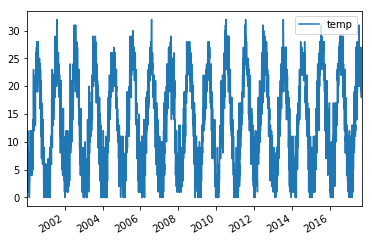

In [368]:
close.plot(y="temp")

It would be cheating if we would take SPY value of the current day (or even headlines @siraj :P) because this information will of course change the MSFT value on that day, but then it's not "predicting" the stock market movement, it's just reading it.

In [369]:
close["shifted_spy_diff"] = (close["SPY"].shift(+1) - close["SPY"].shift(+2)) / close["SPY"].shift(+2)

In [370]:
close["yesterday"] = close["MSFT"].shift(+1)

In [371]:
close["msft_diff"] = (close["MSFT"] - close["MSFT"].shift(+1)) / close["MSFT"].shift(+1)

In [372]:
close.head()

,MSFT,SPY,GDP,temp,shifted_spy_diff,yesterday,msft_diff
2000-01-03,58.28125,145.4375,34620.0,11.0,NaN,NaN,NaN
2000-01-04,56.31250,139.7500,34620.0,11.0,NaN,58.28125,-0.033780
2000-01-05,56.90625,140.0000,34620.0,3.0,-0.039106,56.31250,0.010544
2000-01-06,55.00000,137.7500,34620.0,1.0,0.001789,56.90625,-0.033498
2000-01-07,55.71875,145.7500,34620.0,6.0,-0.016071,55.00000,0.013068


In [373]:
msftmax = close["MSFT"].max()
tempmax = close["temp"].max()
gpdmax = close["GDP"].max()

In [374]:
close["MSFT"]/=msftmax
close["yesterday"]/=msftmax
close["temp"]/=tempmax
close["GDP"]/=gpdmax


In [375]:
close=close.dropna()


In [376]:
print(close.head())
print("entries:", len(close))

                MSFT     SPY       GDP     temp  shifted_spy_diff  yesterday  \
2000-01-05  0.761084  140.00  0.602443  0.09375         -0.039106   0.753143   
2000-01-06  0.735589  137.75  0.602443  0.03125          0.001789   0.761084   
2000-01-07  0.745202  145.75  0.602443  0.18750         -0.016071   0.735589   
2000-01-10  0.750635  146.25  0.602443  0.28125          0.058076   0.745202   
2000-01-11  0.731410  144.50  0.602443  0.21875          0.003431   0.750635   

            msft_diff  
2000-01-05   0.010544  
2000-01-06  -0.033498  
2000-01-07   0.013068  
2000-01-10   0.007291  
2000-01-11  -0.025612  
entries: 4448


In [377]:
y = close.values[:4000,-1]
X = close.values[:4000,2:-1]
y_test = close.values[4000:,-1]
X_test = close.values[4000:,2:-1]

For wavenet, I found 2 implementations, one using tensorflow and another one using keras. For the tensorflow-implementation, someone also implemented local conditioning, which I will use to add the additional data sources.

The implementation expects a wave-file for the main source and a json file with the conditioning information. Let's create them:

In [378]:
from scipy.io.wavfile import write
import json
import sklearn.preprocessing

In [379]:
write("X.wav", 4000, y) #the last column is MSFT from yesterday

In [380]:
json.dump(list(map(list, X)), open("X.json", "w")) #the rest is GDP, temp and spy

for generation, we need to create the local conditioning for the test phase:

In [381]:
json.dump(list(map(list, X_test)), open("X_test.json", "w")) #the rest is GDP, temp and spy

The wav-file has to be read with audacity and then exported again, because somehow the wavenet-implementation doesn't like it if directly exported with scipy..

I put these files on a high performance GPU-cluster, because wavenet is sooooo slow.. it took around 1 hour to train it on a P100.

We will generate a wave file from this data using the local condition of the test phase, so we need to generate that many samples:

In [382]:
len(X_test)

448

Now import the generated wave file back in:

In [393]:
from scipy.io.wavfile import read
rate, prediction = read("stk_prediction.wav")


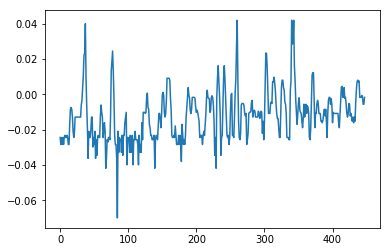

In [394]:
plt.plot(prediction[-448:])

In [395]:
pred = np.cumprod(prediction[-448:]+1) * close["MSFT"][4000]*msftmax

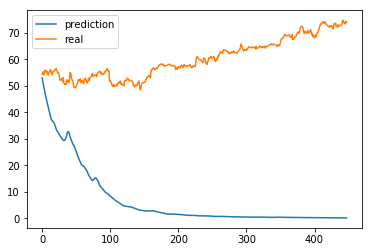

In [396]:
f,ax = plt.subplots(1)
ax.plot(pred, label="prediction")
ax.plot(close["MSFT"].values[4000:]*msftmax, label="real")
plt.legend(loc=0)